In [67]:
import numpy as np
import SimpleITK as sitk
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [68]:
geometric_properties = pd.read_excel(r"D:\Volumes_Thicknesses_cartilage2.xlsx")


In [69]:
geometric_properties

,Cartilage ID,cartilage mean thickness MR [mm],cartilage mean thickness pcct [mm],cartilage std thickness MR [mm],cartilage std thickness pcct [mm],cartilage volume MR [mm^3],cartilage volume pcct [mm^3]
0,07_2017_femoral_cartilage,3.023222,3.145200,0.848746,0.931080,6335.047195,9121.870545
1,17_2016_femoral_cartilage,3.440990,3.104185,0.996718,1.005908,8018.924830,7546.834262
2,18_2018_femoral_cartilage,3.685220,2.887672,0.902018,0.901382,7472.300734,7318.641425
3,30_2017_femoral_cartilage,3.114564,2.941565,0.886422,0.913863,5714.027007,7458.025499
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,07_2017_retro_patellar_cartilage,3.823373,3.502910,0.772183,1.056949,3110.334522,2464.614683
6,17_2016_retro_patellar_cartilage,3.789577,3.814466,0.773957,0.926012,2972.330230,2439.474682
7,18_2018_retro_patellar_cartilage,3.823237,3.283422,0.876968,0.975920,2178.272167,1702.414235
8,30_2017_retro_patellar_cartilage,3.338199,3.272804,0.902776,1.172010,1698.686084,2163.464366
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# set3 = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
# sns.color_palette("hls", 8)


C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\3082087.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


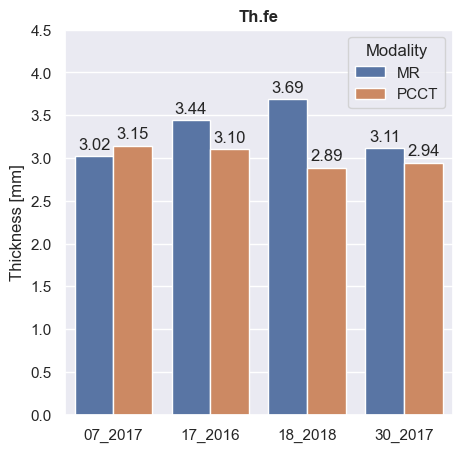

In [71]:
# sns.relplot(
#     data=geometric_properties[0:3],
#     x='cartilage mean thickness MR [mm]', y='cartilage mean thickness pcct [mm]')

# sns.barplot(data=geometric_properties[0:3],
#     x=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], y='Cartilage ID')


df_selected = geometric_properties.iloc[0:4]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

# plt.figure(figsize=(5, 6))
# sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)
# plt.title('Femoral cartilage', fontweight='bold')
# plt.xlabel('')  # Remove x-axis tick labels
# plt.show()


# Plotting with seaborn
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

# Customizing the plot
plt.title('Th.fe', fontweight='bold')
plt.xlabel('')  # Remove x-axis label
plt.ylim(0, 4.5)
plt.ylabel('Thickness [mm]',fontweight='bold')
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\3673156970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


Text(0.5, 0, '')

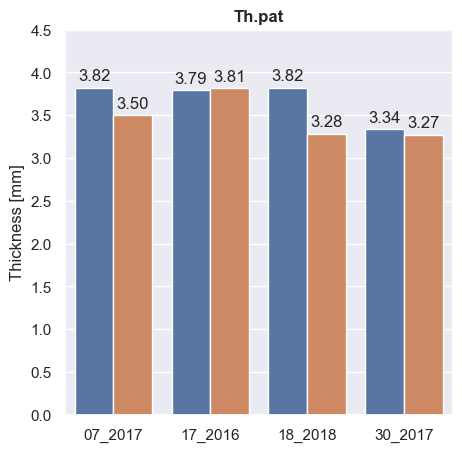

In [72]:
df_selected = geometric_properties.iloc[5:9]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

# Adding values on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')


# Customizing the plot
plt.title('Th.pat', fontweight='bold')
plt.legend().remove()
plt.ylim(0, 4.5)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Thickness [mm]',fontweight='bold')

C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\4213952770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


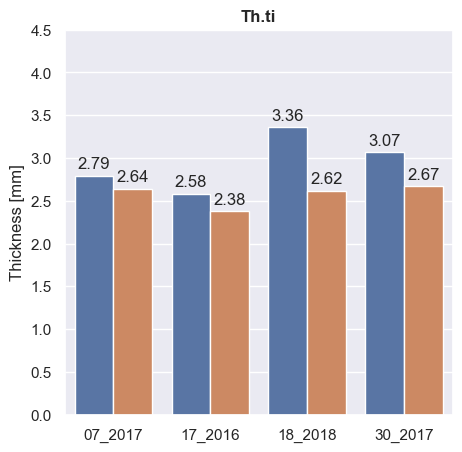

In [73]:
df_selected = geometric_properties.iloc[10:14]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage mean thickness MR [mm]','cartilage mean thickness pcct [mm]'], var_name='Modality', value_name='Thickness [mm]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage mean thickness MR [mm]': 'MR',
    'cartilage mean thickness pcct [mm]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Thickness [mm]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')


plt.title('Th.ti', fontweight='bold')
plt.legend().remove()
plt.ylim(0, 4.5)
plt.xlabel('')  # Remove x-axis tick labels
plt.ylabel('Thickness [mm]',fontweight='bold')
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\4195554599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


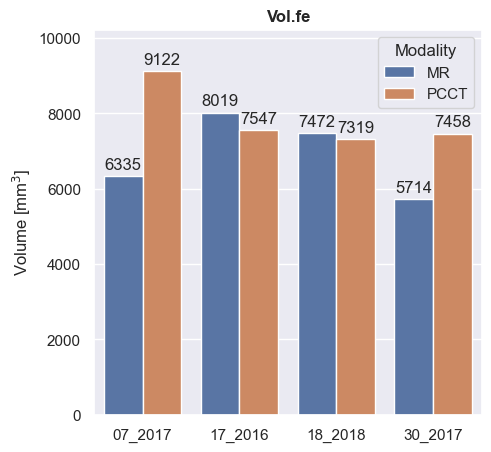

In [83]:
df_selected = geometric_properties.iloc[0:4]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.fe', fontweight='bold')
plt.xlabel('')  # Remove x-axis tick labels
plt.ylim(0, df_melted['Volume [mm$^3$]'].max() + 1100)
plt.ylabel('Volume [mm$^3$]',fontweight='bold')
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\3542210752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


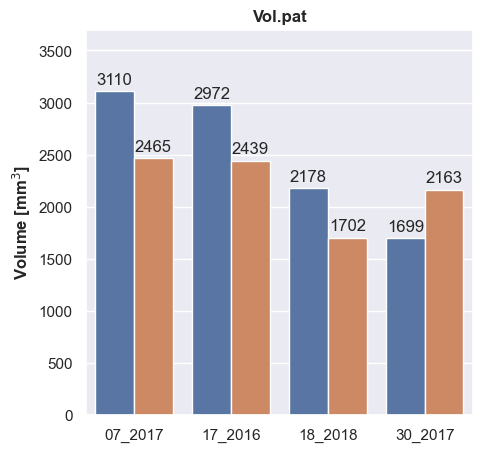

In [85]:
df_selected = geometric_properties.iloc[5:9]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.pat', fontweight='bold')
plt.legend().remove()
plt.xlabel('')  # Remove x-axis tick labels
plt.ylabel('Volume [mm$^3$]',fontweight='bold')
plt.ylim(0, 3700)
plt.show()

C:\Users\20201900\AppData\Local\Temp\ipykernel_89412\2800625489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)


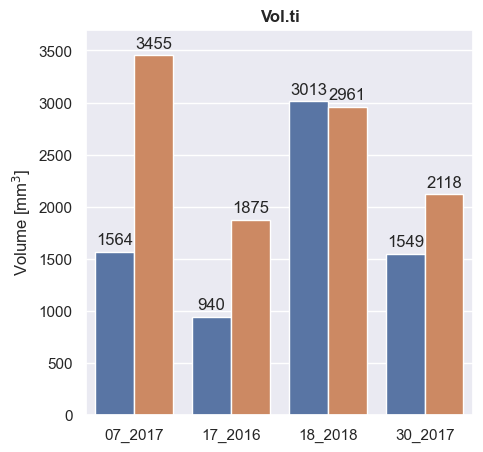

In [76]:
df_selected = geometric_properties.iloc[10:14]
df_selected['Cartilage ID'] = df_selected['Cartilage ID'].str.slice(0,7)
# df_selected['Value'] = df_selected['Value'].str.slice(14,-1)

df_melted = df_selected.melt(id_vars='Cartilage ID', value_vars=['cartilage volume MR [mm^3]','cartilage volume pcct [mm^3]'], var_name='Modality', value_name='Volume [mm$^3$]')

df_melted['Modality'] = df_melted['Modality'].replace({
    'cartilage volume MR [mm^3]': 'MR',
    'cartilage volume pcct [mm^3]': 'PCCT'})

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Cartilage ID', y='Volume [mm$^3$]', hue='Modality', data=df_melted)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # Adjust this value to move the text up/down
                    textcoords='offset points')

plt.title('Vol.ti', fontweight='bold')
plt.legend().remove()
plt.xlabel('')  # Remove x-axis tick labels
plt.ylim(0, 3700)
plt.show()

### Overlap Scores


In [77]:
DSC = {'07_2017_fe': 0.3891,
       '07_2017_pat': 0.3153,
       '07_2017_ti': 0.2299,
       '17_2016_fe': 0.4222,
       '17_2016_pat': 0.3969,
       '17_2016_ti': 0.5243,
       '18_2018_fe': 0.1644,
       '18_2018_pat': 0.2816,
       '18_2018_ti': 0.2672,
       '30_2017_fe': 0.5830,
       '30_2017_pat': 0.4012,
       '30_2017_ti': 0.4834
} 

HDD = {'07_2017_fe': 12.16,
       '07_2017_pat': 5.89,
       '07_2017_ti': 6.88,
       '17_2016_fe': 5.80,
       '17_2016_pat': 4.96,
       '17_2016_ti': 5.41,
       '18_2018_fe': 12.06,
       '18_2018_pat': 8.43,
       '18_2018_ti': 13.34,
       '30_2017_fe': 6.96,
       '30_2017_pat': 5.12,
       '30_2017_ti': 5.42
} 

FN = {'07_2017_fe': 0.5702,
       '07_2017_pat': 0.6311,
       '07_2017_ti': 0.7983,
       '17_2016_fe': 0.1718,
       '17_2016_pat': 0.4730,
       '17_2016_ti': 0.4467,
       '18_2018_fe': 0.7696,
       '18_2018_pat': 0.6822,
       '18_2018_ti': 0.6506,
       '30_2017_fe': 0.2388,
       '30_2017_pat': 0.5859,
       '30_2017_ti': 0.3988
} 

FP = {'07_2017_fe': 0.0029,
       '07_2017_pat': 0.0016,
       '07_2017_ti': 0.0025,
       '17_2016_fe': 0.0203,
       '17_2016_pat': 0.0950,
       '17_2016_ti': 0.0299,
       '18_2018_fe': 0.0023,
       '18_2018_pat': 0.0006,
       '18_2018_ti': 0.0008,
       '30_2017_fe': 0.0010,
       '30_2017_pat': 0.0003,
       '30_2017_ti': 0.0003
}

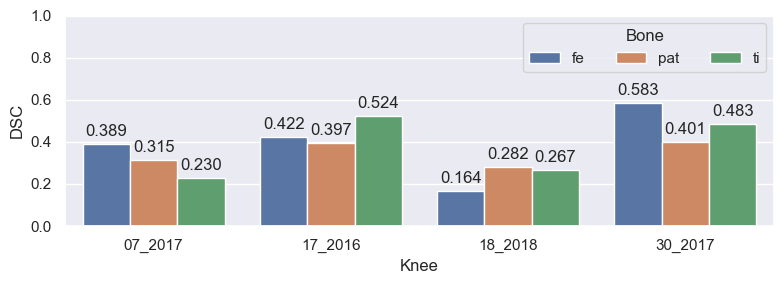

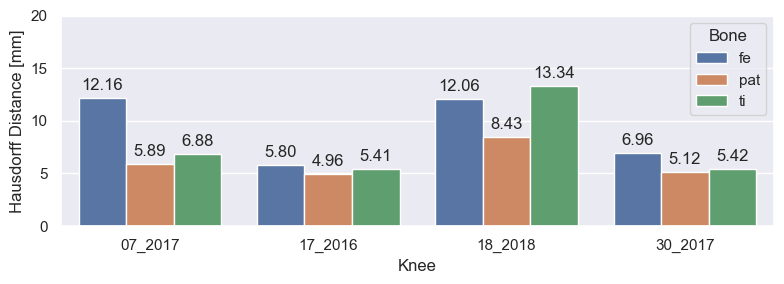

In [97]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# Provided data
DSC = {'07_2017_fe': 0.3891,
       '07_2017_pat': 0.3153,
       '07_2017_ti': 0.2299,
       '17_2016_fe': 0.4222,
       '17_2016_pat': 0.3969,
       '17_2016_ti': 0.5243,
       '18_2018_fe': 0.1644,
       '18_2018_pat': 0.2816,
       '18_2018_ti': 0.2672,
       '30_2017_fe': 0.5830,
       '30_2017_pat': 0.4012,
       '30_2017_ti': 0.4834
} 

HDD = {'07_2017_fe': 12.16,
       '07_2017_pat': 5.89,
       '07_2017_ti': 6.88,
       '17_2016_fe': 5.80,
       '17_2016_pat': 4.96,
       '17_2016_ti': 5.41,
       '18_2018_fe': 12.06,
       '18_2018_pat': 8.43,
       '18_2018_ti': 13.34,
       '30_2017_fe': 6.96,
       '30_2017_pat': 5.12,
       '30_2017_ti': 5.42
}

# Set Seaborn background style
# sns.set_style("darkgrid")

# Converting data to DataFrame
data_dsc = pd.DataFrame(list(DSC.items()), columns=['Knee_Type', 'DSC'])
data_hdd = pd.DataFrame(list(HDD.items()), columns=['Knee_Type', 'Hausdorff Distance [mm]'])

# Extracting knee and type from Knee_Type
data_dsc[['Knee', 'Cartilage']] = data_dsc['Knee_Type'].str.rsplit('_', n=1, expand=True)
data_hdd[['Knee', 'Cartilage']] = data_hdd['Knee_Type'].str.rsplit('_', n=1, expand=True)

# Plotting DSC
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Knee', y='DSC', hue='Cartilage', data=data_dsc)
# plt.title('DSC Scores Grouped by Knee and Type')
plt.xticks()
plt.ylim([0,1])
plt.tight_layout()

# Annotate each bar with the value
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.legend(title='Bone', loc="upper right", ncol=3)
plt.show()

# Plotting Hausdorff
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Knee', y='Hausdorff Distance [mm]', hue='Cartilage', data=data_hdd)
# plt.title('Hausdorff Scores Grouped by Knee and Type')
plt.xticks()
plt.ylim([0,20])
plt.tight_layout()

# Annotate each bar with the value
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        # print(f"Bar height: {height}")  # Debug print statement
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.legend(title='Bone',loc="upper right", ncol=1)
plt.show()


In [79]:
data_dsc['Knee'].str.split('_')

0     [07, 2017]
1     [07, 2017]
2     [07, 2017]
3     [17, 2016]
4     [17, 2016]
5     [17, 2016]
6     [18, 2018]
7     [18, 2018]
8     [18, 2018]
9     [30, 2017]
10    [30, 2017]
11    [30, 2017]
Name: Knee, dtype: object

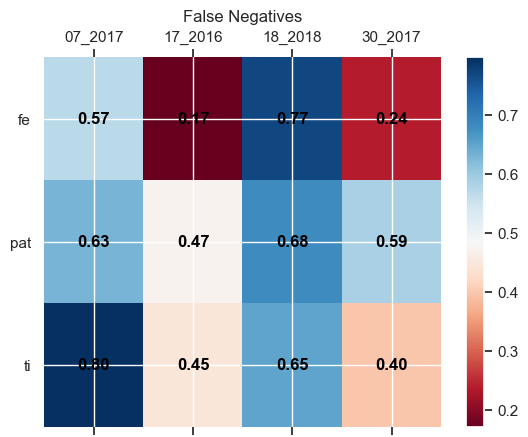

Type Day  Year      fe     pat      ti
0     07  2017  0.5702  0.6311  0.7983
1     17  2016  0.1718  0.4730  0.4467
2     18  2018  0.7696  0.6822  0.6506
3     30  2017  0.2388  0.5859  0.3988


In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
FN = {
    '07_2017_fe': 0.5702,
    '07_2017_pat': 0.6311,
    '07_2017_ti': 0.7983,
    '17_2016_fe': 0.1718,
    '17_2016_pat': 0.4730,
    '17_2016_ti': 0.4467,
    '18_2018_fe': 0.7696,
    '18_2018_pat': 0.6822,
    '18_2018_ti': 0.6506,
    '30_2017_fe': 0.2388,
    '30_2017_pat': 0.5859,
    '30_2017_ti': 0.3988
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(FN.items()), columns=['Name', 'Value'])

# Extracting year, month, and type information
df[['Day', 'Year', 'Type']] = df['Name'].str.split('_', expand=True)
df.drop(columns=['Name'], inplace=True)
df_pivot = df.pivot(index=['Day', 'Year'], columns='Type', values='Value').reset_index()

# Create intensity-based table
fig, ax = plt.subplots()
cax = ax.matshow(df_pivot.set_index(['Day', 'Year']).T, cmap='RdBu', aspect='auto')

ax.spines[:].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Setting up ticks and labels
ax.set_xticks(range(len(df_pivot)))
ax.set_xticklabels([f"{day}_{year}" for day, year in zip(df_pivot['Day'], df_pivot['Year'])], rotation=0)
ax.set_yticks(range(len(df_pivot.columns[2:])))
ax.set_yticklabels(df_pivot.columns[2:])



# Add values to the center of each cell
for i in range(len(df_pivot)):
    for j in range(len(df_pivot.columns[2:])): 
        value = df_pivot.iloc[i, j+2]
        ax.text(i, j, f"{value:.2f}", va='center', ha='center', color='black', fontweight='bold')

# Adding color bar
fig.colorbar(cax)
plt.title('False Negatives')
# Show plot
plt.show()

# Display DataFrame for clarity
print(df_pivot)


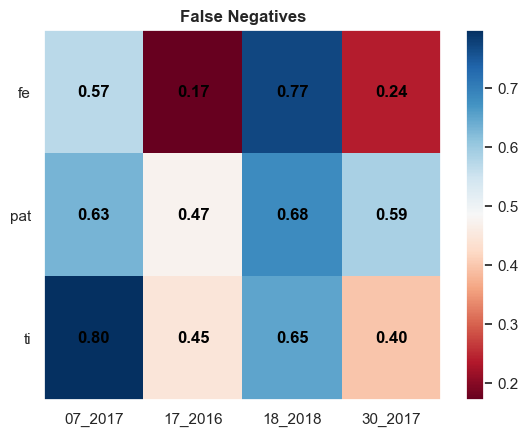

Type Day  Year      fe     pat      ti
0     07  2017  0.5702  0.6311  0.7983
1     17  2016  0.1718  0.4730  0.4467
2     18  2018  0.7696  0.6822  0.6506
3     30  2017  0.2388  0.5859  0.3988


In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
FN = {
    '07_2017_fe': 0.5702,
    '07_2017_pat': 0.6311,
    '07_2017_ti': 0.7983,
    '17_2016_fe': 0.1718,
    '17_2016_pat': 0.4730,
    '17_2016_ti': 0.4467,
    '18_2018_fe': 0.7696,
    '18_2018_pat': 0.6822,
    '18_2018_ti': 0.6506,
    '30_2017_fe': 0.2388,
    '30_2017_pat': 0.5859,
    '30_2017_ti': 0.3988
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(FN.items()), columns=['Name', 'Value'])

# Extracting year, month, and type information
df[['Day', 'Year', 'Type']] = df['Name'].str.split('_', expand=True)
df.drop(columns=['Name'], inplace=True)
df_pivot = df.pivot(index=['Day', 'Year'], columns='Type', values='Value').reset_index()

# Create intensity-based table
fig, ax = plt.subplots()
cax = ax.imshow(df_pivot.set_index(['Day', 'Year']).T, cmap='RdBu', aspect='auto')

# Setting up ticks and labels
ax.set_xticks(range(len(df_pivot)))
ax.set_xticklabels([f"{day}_{year}" for day, year in zip(df_pivot['Day'], df_pivot['Year'])], rotation=0)
ax.set_yticks(range(len(df_pivot.columns[2:])))
ax.set_yticklabels(df_pivot.columns[2:])

# Add values to the center of each cell
for i in range(len(df_pivot)):
    for j in range(len(df_pivot.columns[2:])): 
        value = df_pivot.iloc[i, j+2]
        ax.text(i, j, f"{value:.2f}", va='center', ha='center', color='black', fontweight='bold')

# Removing grid lines
ax.grid(False)
ax.set_xticks(range(len(df_pivot)), minor=True)
ax.set_yticks(range(len(df_pivot.columns[2:])), minor=True)
ax.tick_params(which="minor", size=0)

# Adding color bar
fig.colorbar(cax)
plt.title('False Negatives', fontweight='bold')
# Show plot
plt.show()

# Display DataFrame for clarity
print(df_pivot)


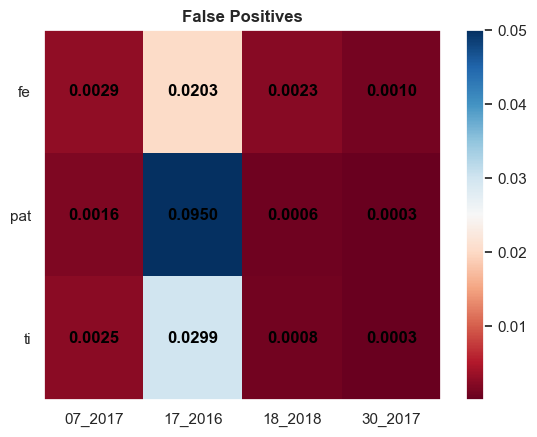

Type Day  Year      fe     pat      ti
0     07  2017  0.0029  0.0016  0.0025
1     17  2016  0.0203  0.0950  0.0299
2     18  2018  0.0023  0.0006  0.0008
3     30  2017  0.0010  0.0003  0.0003


In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
FP = {'07_2017_fe': 0.0029,
       '07_2017_pat': 0.0016,
       '07_2017_ti': 0.0025,
       '17_2016_fe': 0.0203,
       '17_2016_pat': 0.0950,
       '17_2016_ti': 0.0299,
       '18_2018_fe': 0.0023,
       '18_2018_pat': 0.0006,
       '18_2018_ti': 0.0008,
       '30_2017_fe': 0.0010,
       '30_2017_pat': 0.0003,
       '30_2017_ti': 0.0003
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(FP.items()), columns=['Name', 'Value'])

# Extracting year, month, and type information
df[['Day', 'Year', 'Type']] = df['Name'].str.split('_', expand=True)
df.drop(columns=['Name'], inplace=True)
df_pivot = df.pivot(index=['Day', 'Year'], columns='Type', values='Value').reset_index()

# Create intensity-based table
fig, ax = plt.subplots()
cax = ax.imshow(df_pivot.set_index(['Day', 'Year']).T, cmap='RdBu', aspect='auto',vmin=0.000001, vmax=0.05)

# Setting up ticks and labels
ax.set_xticks(range(len(df_pivot)))
ax.set_xticklabels([f"{day}_{year}" for day, year in zip(df_pivot['Day'], df_pivot['Year'])], rotation=0)
ax.set_yticks(range(len(df_pivot.columns[2:])))
ax.set_yticklabels(df_pivot.columns[2:])

# Add values to the center of each cell
for i in range(len(df_pivot)):
    for j in range(len(df_pivot.columns[2:])): 
        value = df_pivot.iloc[i, j+2]
        ax.text(i, j, f"{value:.4f}", va='center', ha='center', color='black', fontweight='bold')

# Removing grid lines
ax.grid(False)
ax.set_xticks(range(len(df_pivot)), minor=True)
ax.set_yticks(range(len(df_pivot.columns[2:])), minor=True)
ax.tick_params(which="minor", size=0)

# Adding color bar
fig.colorbar(cax)
plt.title('False Positives', fontweight='bold')
# Show plot
plt.show()

# Display DataFrame for clarity
print(df_pivot)
